In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_path = '../data/auto_seg_tiff/s_12_z_1/crops'

(34, 66)


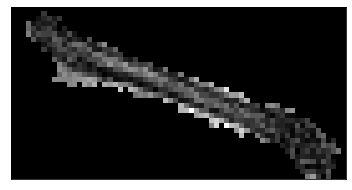

In [46]:
img_orig = cv2.imread(os.path.join(data_path,'crop-0.png'),0)
print(img_orig.shape)

plt.figure()
plt.xticks([]),plt.yticks([])
plt.imshow(img_orig,'gray')
plt.show()

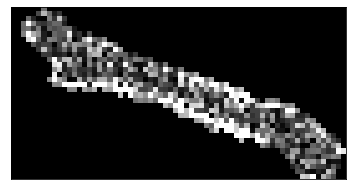

In [11]:
ddepth = cv2.CV_16S
kernel_size = 1
dst = cv2.Laplacian(img_orig, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)

plt.figure()
plt.xticks([]),plt.yticks([])
plt.imshow(abs_dst,'gray')
plt.show()

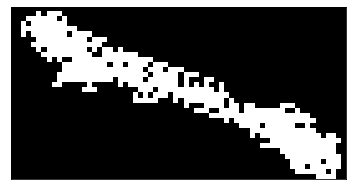

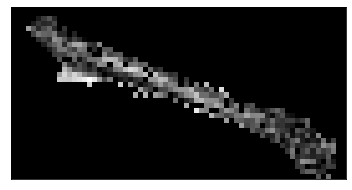

In [59]:
thresh = 180

rows,cols = abs_dst.shape
midy = np.floor(rows / 2)
midx = np.floor(cols / 2)
mask = np.zeros(abs_dst.shape)
mask = cv2.convertScaleAbs(mask)
processed = np.zeros(abs_dst.shape)

toprocess = [[int(midy),int(midx)]]
while len(toprocess) > 0:
    coord = toprocess.pop(0)
    mask[coord[0]][coord[1]] = 255
    processed[coord[0]][coord[1]] = 1
    
    # Find adjacent pixels
    adjacent = []
    if coord[0] != 0:
        adjacent.append([coord[0] - 1, coord[1]])
    if coord[0] != rows - 1:
        adjacent.append([coord[0] + 1, coord[1]])
    if coord[1] != 0:
        adjacent.append([coord[0], coord[1] - 1])
    if coord[1] != cols - 1:
        adjacent.append([coord[0], coord[1] + 1])
        
    # See if they should be added
    for i in range(len(adjacent)):        
        test_coord = adjacent[i]
      
        if processed[test_coord[0]][test_coord[1]] != 1:           
            val = abs_dst[test_coord[0]][test_coord[1]]
            if val != 0 and val <= thresh:
                processed[test_coord[0]][test_coord[1]] = 1
                toprocess.append(test_coord)

# Mask original
final_img = cv2.bitwise_and(mask,img_orig)

plt.figure()
plt.xticks([]),plt.yticks([])
plt.imshow(mask,'gray')
plt.show()

plt.figure()
plt.xticks([]),plt.yticks([])
plt.imshow(final_img,'gray')
plt.show()